TRISKELE Python wrapper
====

Quick start
-----

Triskele Python is just a simple wrapper of apGenerator. It offers a class `Triskele` to setup the data and the environment.

In [1]:
import numpy as np
import triskele

In [5]:
data = np.random.random((10,10))
data.shape

(10, 10)

In [6]:
t = triskele.Triskele(data)

Then use `filter` method to retrieve filtered layers stacked along the last axis .

In [7]:
layers = t.filter(tree='max-tree', area=[10, 100, 500], standard_deviation=[.5, .8], moment_of_inertia=[.2, .5])
layers.shape

(10, 10, 8)

Overview
---

### Basic filtering

The current parameters allowed for the `filter` method are: 

- `tree` can be 'max-tree' (default), 'min-tree', 'tos-tree' for tree of shape or 'alpha-tree'.
- `area` list of area thresholds (can be `None`)
- `standard-deviation` list of SD thresholds (can be `None`)
- `moment_of_inertia` list of MoI thresholds (can be `None`)
- `features` can be 'weight' (default), 'mean', 'SD', 'area' or 'MOI'


In [8]:
from scipy import ndimage
import matplotlib.pyplot as plt

Create a synthetic image.

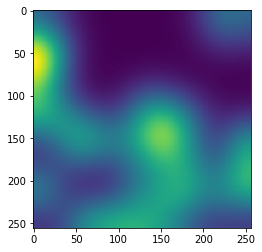

In [9]:
n = 5; l = 256

im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(2.*n))

plt.imshow(im)
plt.show()

Create a Triskele instance, try some filtering.

In [35]:
t = triskele.Triskele(im)

area = [1e3, 1e4]
layers = t.filter(tree='max-tree', area=area)

Display the filtered layers.

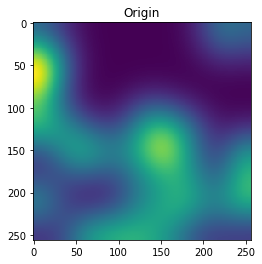

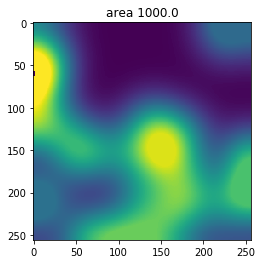

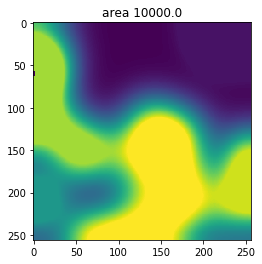

In [36]:
for i in range(layers.shape[-1]):
    plt.imshow(layers[:,:,i])
    plt.title('area {}'.format(area[i-1]) if i != 0 else 'Origin')
    plt.show()

### Stack filtering

You can stack several layers and apply filtering directry to them. Each layer is filtered independently.

In [47]:
stack = np.random.random((256, 256, 20))
stack.shape

(256, 256, 20)

In [48]:
t = triskele.Triskele(stack)

t.filter(area=[10, 100, 1e3]).shape

(256, 256, 80)

## Extra

### TIF reader and writer

Triskele wrapper comes with utility functions to read and write TIF files (this seems to be a very tedious task in Python...)

In [43]:
triskele.write('demo.tif', layers)

demo = triskele.read('./demo.tif')

(demo == layers).all()

True